# Practice Case - Machine learning

# Scenario

This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. 

# Data Pre-processing

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv data
df= pd.read_csv('ML_2_Fellow.csv')

In [3]:
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print('Shape dataset:', df.shape)
print('\nInformasi dataset:')
print(df.info())
print('\nStatistik deskriptif:\n', df.describe())

Shape dataset: (541909, 8)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB
None

Statistik deskriptif:
               Jumlah   Harga_Satuan  Kode_Pelanggan
count  535874.000000  535874.000000   403182.000000
mean        9.587927       4.636533    15287.687868
std       153.292222      97.302232     1714.009551
min    -74215.000000  -11062.060000    12346.000000
25%        

## Check duplicate data

In [5]:
print('Jumlah Data Duplikasi dalam Dataset:', df.duplicated(subset=None).sum())

Jumlah Data Duplikasi dalam Dataset: 5268


In [6]:
# Remove duplicate data
df.drop_duplicates(inplace=True)

# Check rows and columns after removing
print('Shape akhir: ', df.shape)

Shape akhir:  (536641, 8)


## Check missing value

In [7]:
print("Before imputation:")
# Checking missing value for each feature  
print(df.isnull().sum())

Before imputation:
Kode_Bayar                0
Kode_Barang            5989
Barang                 7443
Jumlah                 5989
Tanggal_Transaksi      5989
Harga_Satuan           5989
Kode_Pelanggan       138638
Negara                 5989
dtype: int64


In [8]:
df2=df[df['Kode_Barang'].isnull()]
df2.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,"536520,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Spliting Data and Imputing NaN Values

In [9]:
df2['Kode_Barang']=df2['Kode_Bayar'].str.split(',').str[1]
df2['Barang']=df2['Kode_Bayar'].str.split('"').str[1]
df2['Jumlah']=df2['Kode_Bayar'].str.split(',').str[-5]
df2['Tanggal_Transaksi']=df2['Kode_Bayar'].str.split(',').str[-4]
df2['Harga_Satuan']=df2['Kode_Bayar'].str.split(',').str[-3]
df2['Kode_Pelanggan']=df2['Kode_Bayar'].str.split(',').str[-2]
df2['Negara']=df2['Kode_Bayar'].str.split(',').str[-1]
df2['Kode_Bayar']=df2['Kode_Bayar'].str.split(',').str[0]

<ipython-input-9-247f73d09441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Kode_Barang']=df2['Kode_Bayar'].str.split(',').str[1]
<ipython-input-9-247f73d09441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Barang']=df2['Kode_Bayar'].str.split('"').str[1]
<ipython-input-9-247f73d09441>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [10]:
df2

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,"FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
871,536477,22041,RECORD FRAME 7,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,536520,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,14729,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,RECORD FRAME 7,2,12/9/2011 10:26,5.79,,United Kingdom
541549,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,CHARLIE+LOLA,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [11]:
# drop rows with NaN data from main dataset

df = df.drop(df2.index)

In [12]:
# combine main dataset with dataframe after imputing
df = df.append(df2)

In [13]:
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541379,581498,22041,RECORD FRAME 7,2,12/9/2011 10:26,5.79,,United Kingdom
541549,581501,22165,"DIAMANTE HEART SHAPED WALL MIRROR,",12,12/9/2011 10:46,3.95,12985,United Kingdom
541614,581516,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,12/9/2011 11:26,1.25,14422,United Kingdom
541649,581538,85071C,CHARLIE+LOLA,1,12/9/2011 11:34,0.39,14446,United Kingdom


In [14]:
# Recheck missing value after combine

print(df.isnull().sum())

Kode_Bayar                0
Kode_Barang               0
Barang                 1454
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       132649
Negara                    0
dtype: int64


In [15]:
# Drop Missing Values

df[df['Barang'].isnull()]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1.0,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1.0,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1.0,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2.0,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15.0,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6.0,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27.0,12/8/2011 10:33,0.0,NaN,United Kingdom


In [16]:
df=df.dropna(subset=['Barang','Kode_Pelanggan'])

In [17]:
print(df.isnull().sum())
df.info()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 403992 entries, 0 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Kode_Bayar         403992 non-null  object
 1   Kode_Barang        403992 non-null  object
 2   Barang             403992 non-null  object
 3   Jumlah             403992 non-null  object
 4   Tanggal_Transaksi  403992 non-null  object
 5   Harga_Satuan       403992 non-null  object
 6   Kode_Pelanggan     403992 non-null  object
 7   Negara             403992 non-null  object
dtypes: object(8)
memory usage: 27.7+ MB


## Convert data types

In [18]:
df['Jumlah'] = df.Jumlah.astype(float)

<ipython-input-18-8fa83392f9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jumlah'] = df.Jumlah.astype(float)


In [19]:
df['Harga_Satuan'] = df.Harga_Satuan.astype(float)

<ipython-input-19-4a22385088d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Harga_Satuan'] = df.Harga_Satuan.astype(float)


In [20]:
df[['Tanggal_Transaksi']]= df[['Tanggal_Transaksi']].apply(pd.to_datetime)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df['Tanggal_Transaksi']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541379   2011-12-09 10:26:00
541549   2011-12-09 10:46:00
541614   2011-12-09 11:26:00
541649   2011-12-09 11:34:00
541787   2011-12-09 12:16:00
Name: Tanggal_Transaksi, Length: 403992, dtype: datetime64[ns]

In [22]:
df['Tanggal_Transaksi'].value_counts()

2011-11-14 15:27:00    543
2011-11-28 15:54:00    534
2011-12-05 17:17:00    530
2011-11-23 13:39:00    444
2011-10-31 14:09:00    436
                      ... 
2011-11-24 17:29:00      1
2011-12-07 12:38:00      1
2011-10-19 11:45:00      1
2011-04-18 13:34:00      1
2011-08-24 16:16:00      1
Name: Tanggal_Transaksi, Length: 20998, dtype: int64

In [23]:
df.dtypes

Kode_Bayar                   object
Kode_Barang                  object
Barang                       object
Jumlah                      float64
Tanggal_Transaksi    datetime64[ns]
Harga_Satuan                float64
Kode_Pelanggan               object
Negara                       object
dtype: object

### dataset already cleaned

# Case 1

### 1.	What items customers buy the most?

In [80]:
df_item= df.groupby(by=['Barang']).sum()[['Jumlah']].reset_index()

In [81]:
df_item_order= df_item[df_item['Jumlah'] >0 ]

In [83]:
df_item_order.sort_values(by=['Jumlah'], ascending = False).head()

,Barang,Jumlah
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119.0
1768,JUMBO BAG RED RETROSPOT,44963.0
217,ASSORTED COLOUR BIRD ORNAMENT,35215.0
3693,WHITE HANGING HEART T-LIGHT HOLDER,34128.0
2255,PACK OF 72 RETROSPOT CAKE CASES,33386.0


### What items we should ignore?

In [51]:
df_bjh= df.groupby(by=['Barang', 'Harga_Satuan']).sum()[['Jumlah']].reset_index()


,Barang,Harga_Satuan,Jumlah
0,4 PURPLE FLOCK DINNER CANDLES,0.79,49.0
1,4 PURPLE FLOCK DINNER CANDLES,2.55,89.0
2,50'S CHRISTMAS GIFT BAG LARGE,1.04,400.0
3,50'S CHRISTMAS GIFT BAG LARGE,1.25,1483.0
4,DOLLY GIRL BEAKER,1.08,1400.0
...,...,...,...
9260,ZINC WIRE SWEETHEART LETTER TRAY,1.25,13.0
9261,ZINC WIRE SWEETHEART LETTER TRAY,3.29,31.0
9262,ZINC WIRE SWEETHEART LETTER TRAY,3.75,36.0
9263,"mouldy, thrown away.",0.00,-2600.0


In [54]:
df_bjh=df_bjh[df_bjh['Jumlah'] >=0 ]

In [57]:
df_bjh= df_bjh.sort_values(by=['Jumlah'], ascending = True).head()

In [59]:
df_bjh= df_bjh.sort_values(by=['Harga_Satuan'], ascending = True).head()
df_bjh

,Barang,Harga_Satuan,Jumlah
1532,CHILDS BREAKFAST SET CIRCUS PARADE,0.00,1.0
5389,PACK 4 FLOWER/BUTTERFLY PATCHES,1.25,1.0
5388,PACK 3 IRON ON DOG PATCHES,2.46,1.0
8447,TWO DOOR CURIO CABINET,6.00,1.0
2039,DAISY SKETCHBOOK,7.46,1.0


### The most buy items is WORLD WAR 2 GLIDERS ASSTD DESIGN with 53119 items were sold and we should ignore PACK 4 FLOWER/BUTTERFLY PATCHES because with cheap price but it sold just one item. 

# Case 2

### 2.	What is our strategy to increase sales based on our export destination countries?

In [77]:
df_nbj=df.groupby(by=['Negara', 'Barang']).max()[['Jumlah']].reset_index()

In [78]:
df_nbj.sort_values(by=['Jumlah'], ascending = False).head()

,Negara,Barang,Jumlah
17582,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995.0
17257,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,74215.0
15543,United Kingdom,ASSTD DESIGN 3D PAPER STICKERS,12540.0
19044,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800.0
18524,United Kingdom,SMALL POPCORN HOLDER,4300.0


### For increasing sales, we can produce more Paper Crafts and expore to UK


# Case 3

### 3.	Do customer segmentation appropriately. Please explain in detail and completely

In [30]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.cm as cm

### Building features for RFM model:

### 1. Recency:

In [31]:
referenceDate = df['Tanggal_Transaksi'].max()
referenceDate += datetime.timedelta(days = 1)

df['Recency'] = (referenceDate - df['Tanggal_Transaksi']).astype('timedelta64[D]')
dfCustomerHistory = df.groupby("Kode_Pelanggan").min().reset_index()[['Kode_Pelanggan', 'Recency']]
dfCustomerHistory.head()
dfCustomerHistory= dfCustomerHistory[dfCustomerHistory['Recency']>0]

<ipython-input-31-797ff954c66d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recency'] = (referenceDate - df['Tanggal_Transaksi']).astype('timedelta64[D]')


### 2. Frequency:

In [32]:
dfCustomerFrequency = df[['Kode_Pelanggan', 'Jumlah']].groupby('Kode_Pelanggan').count().reset_index()
dfCustomerFrequency.rename(columns={'Jumlah': 'Frequency'}, inplace= True)
dfCustomerHistory = dfCustomerHistory.merge(dfCustomerFrequency, how="outer")
dfCustomerHistory= dfCustomerHistory[dfCustomerHistory['Frequency']>0]

### 3. Monetary/ Amount:

In [33]:
dfCustomerMV = df[['Kode_Pelanggan', 'Jumlah']].groupby('Kode_Pelanggan').sum().reset_index()
dfCustomerMV.rename(columns={'Jumlah': 'MonetaryValue'}, inplace= True)
dfCustomerHistory = dfCustomerHistory.merge(dfCustomerMV, how="outer")
#add a small number to monetary value to avoid problems with zeros as we transform to log scale
dfCustomerHistory["MonetaryValue"] = dfCustomerHistory["MonetaryValue"] + 0.001
dfCustomerHistory= dfCustomerHistory[dfCustomerHistory['MonetaryValue']>0]

### Rescalling

In [34]:
from math import log
#Applying log transformations
dfCustomerHistory['log_Recency'] = dfCustomerHistory["Recency"].apply(math.log)
dfCustomerHistory['log_Frequency'] = dfCustomerHistory["Frequency"].apply(math.log)
dfCustomerHistory['log_MonetaryValue'] = dfCustomerHistory["MonetaryValue"].apply(math.log)

In [35]:
#Preparing matrix for standard scaling transformation
X = dfCustomerHistory[["log_Recency", "log_Frequency", "log_MonetaryValue"]]

### Modelling

In [36]:
import pandas as pd  
from sklearn.cluster import KMeans

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 3, random_state = 24)  
labels = cluster_model.fit_predict(X)

In [37]:
X_pred=X.copy()
X_pred['cluster']=labels
X_pred.head()

,log_Recency,log_Frequency,log_MonetaryValue,cluster
0,5.786897,0.693147,-6.907755,1
1,0.693147,5.198497,7.802210,2
2,4.317488,3.433987,7.758334,2
3,2.944439,4.290459,6.447307,2
4,5.736572,2.833213,5.283209,0


In [38]:
cluster_model.cluster_centers_

array([[4.44812616, 3.05858406, 5.33925779],
       [4.62020539, 0.59351836, 2.32917017],
       [2.50169053, 4.78198665, 7.07000421]])

In [39]:
df_new = pd.DataFrame(cluster_model.cluster_centers_, columns= X.columns)
df_new

,log_Recency,log_Frequency,log_MonetaryValue
0,4.448126,3.058584,5.339258
1,4.620205,0.593518,2.329170
2,2.501691,4.781987,7.070004


In [40]:
df_final = pd.concat([pd.Series([0,1,2]), df_new.log_Recency, df_new.log_Frequency, df_new.log_MonetaryValue], axis=1)
df_final.columns = ["Cluster", "Recency", "Frequency", "Amount"]
df_final.head()

,Cluster,Recency,Frequency,Amount
0,0,4.448126,3.058584,5.339258
1,1,4.620205,0.593518,2.329170
2,2,2.501691,4.781987,7.070004


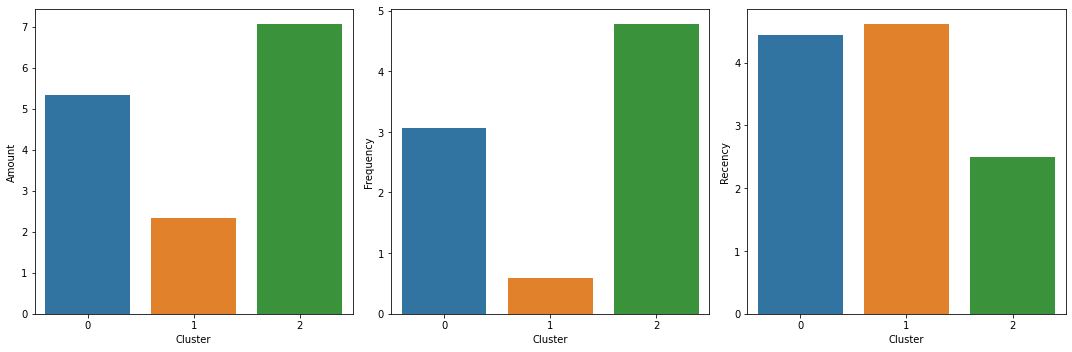

In [41]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df_final.Cluster, y=df_final.Amount, ax = axs[0])
sns.barplot(x=df_final.Cluster, y=df_final.Frequency, ax = axs[1])
sns.barplot(x=df_final.Cluster, y=df_final.Recency, ax = axs[2])
plt.tight_layout()            
plt.show()

Cluster 1 is customers who recently bought items<br>
Cluster 2 is the ones who buy more frequently<br>
Cluster 2 is the ones who spend money the most


# Case 4

### 4.	Get the hidden insight from the data

### Top 10 Country

<AxesSubplot:>

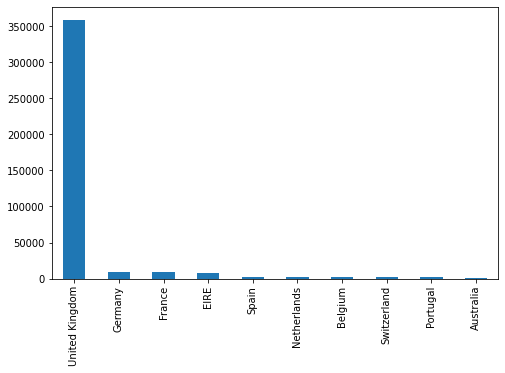

In [42]:
df.Negara.value_counts().head(10).plot.bar(figsize=(8,5))

In [60]:
df.Negara.value_counts().head(10)

United Kingdom    359112
Germany             9480
France              8475
EIRE                7476
Spain               2528
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1471
Australia           1258
Name: Negara, dtype: int64

## Revenue per Country

In [43]:
df['Total_Price']=df['Jumlah']*df['Harga_Satuan']

<ipython-input-43-25711d88b63f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Price']=df['Jumlah']*df['Harga_Satuan']


Text(0.5, 1.0, 'Revenue per Country')

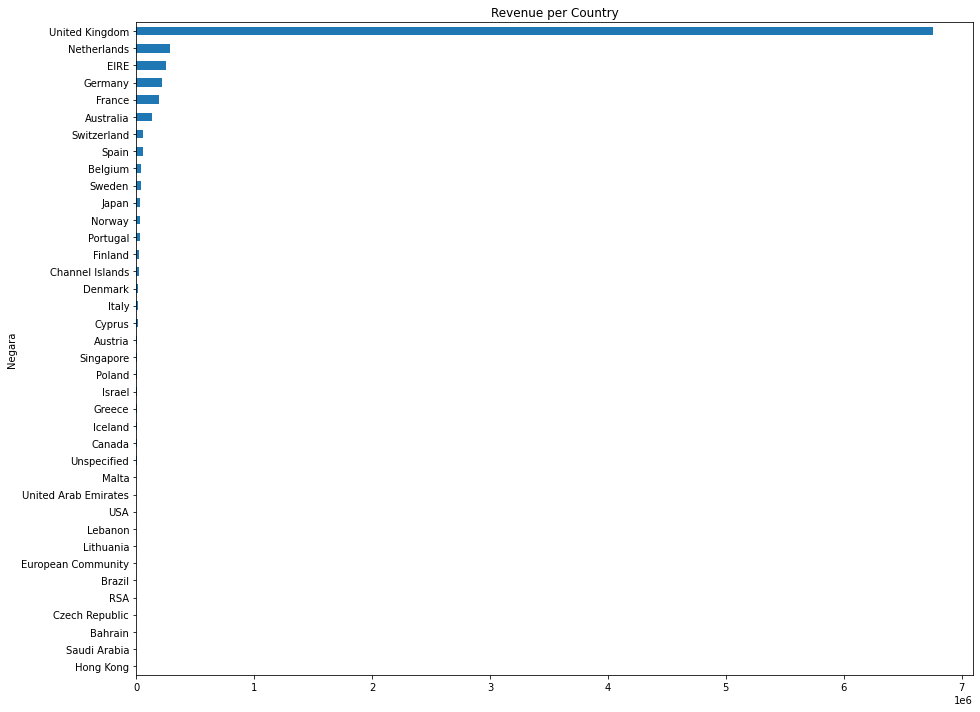

In [44]:
revenue_per_countries = df.groupby(["Negara"])["Total_Price"].sum().sort_values()
revenue_per_countries.plot(kind='barh', figsize=(15,12))
plt.title("Revenue per Country")

### United Kingdom is the highest revenue items during 2010-2011


### Transction by Year

In [45]:
df['year'] = pd.DatetimeIndex(df['Tanggal_Transaksi']).year

<ipython-input-45-17fa3c622b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['Tanggal_Transaksi']).year


In [46]:
df['year'].value_counts()

2011    377354
2010     26638
Name: year, dtype: int64

<AxesSubplot:>

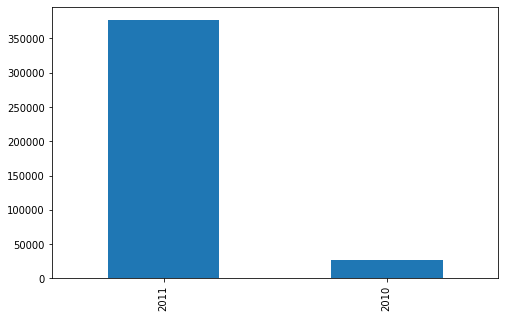

In [47]:
df.year.value_counts().plot.bar(figsize=(8,5))

### Transactions in 2011 are higher than 2010 with 377354 transactions